## Undersøkelse og forberedelse av data

I denne notebooken har vi skrevet eksempelkode for hvordan man skal klargjøre data til modellering. Det er nødvendig å gjøre egne mappinger, samt ta avgjørelser for hva som skal være kategoriske variabler for å få et ferdig datasett som kan brukes videre i maskinlæringsdelen av workshopen. Du er derfor nødt til å gjøre en grundig jobb her for å komme videre til neste notebook. 

Før vi kan begynne med modelleringen er vi nødt til å undersøke dataene grundig. Vi må få en oversikt over:
* Størrelsen
* Fordelingen på fasiten vår
* Mangler vi data?
* Finner vi noe rart?
* Hva er kategorisk og hva er numerisk?
* Hva må mappes og hva må ordnes?
* Ser vi noen sammenhenger som utgjør nye variabler?
* Enkoding

#### Vi starter med å lese inn datasettet til en pandas dataframe

In [1]:
import pandas as pd
df = pd.read_csv('data/fraud.csv')

#### La oss ta en første kikk på dataene, for få oversikt over hva vi skal jobbe med

In [2]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,11555,11556,11557,11558,11559,11560,11561,11562,11563,11564
ID,1068,2945,6883,6121,15197,7462,7104,7882,9432,8667,...,1052,3800,13073,9099,2656,4239,8900,11245,8374,2226
Month,Nov,Jun,Jan,Nov,Oct,Sep,Feb,Dec,Oct,Dec,...,Mar,May,Oct,May,Nov,Jan,Apr,Aug,May,Feb
WeekOfMonth,5,5,3,4,3,2,2,3,2,3,...,5,3,4,4,3,4,3,1,3,3
DayOfWeek,Monday,Thursday,Friday,Saturday,Saturday,Thursday,Wednesday,Thursday,Saturday,Saturday,...,Tuesday,Thursday,Monday,Tuesday,Saturday,Saturday,Monday,Sunday,Sunday,Monday
Make,Accura,Chevrolet,Accura,Mazda,Mazda,Toyota,Toyota,Mazda,Honda,Mazda,...,Chevrolet,Chevrolet,Mazda,Honda,Honda,Ford,Honda,Toyota,Toyota,Pontiac
AccidentArea,Urban,Urban,Urban,Urban,Rural,Urban,Urban,Urban,Urban,Urban,...,Urban,Urban,Rural,Urban,Urban,Rural,Urban,Rural,Urban,Urban
DayOfWeekClaimed,Thursday,Friday,Thursday,Monday,Monday,Tuesday,Tuesday,Thursday,Tuesday,Wednesday,...,Friday,Friday,Wednesday,Tuesday,Monday,Tuesday,Monday,Tuesday,Monday,Thursday
MonthClaimed,Dec,Jul,Feb,Nov,Oct,Sep,Feb,Dec,Oct,Dec,...,Apr,May,Oct,May,Nov,Jan,Apr,Aug,May,Mar
WeekOfMonthClaimed,1,5,3,5,3,2,3,3,2,4,...,1,3,4,4,4,5,3,2,3,1
Sex,Male,Male,Male,Male,Male,Male,Female,Female,Male,Male,...,Male,Male,Female,Male,Male,Male,Male,Male,Female,Female


Her kan vi se at det er et stort overtall av menn i kategorien kjønn eller "Sex" 

In [6]:
df["Sex"].value_counts()

Male      9767
Female    1798
Name: Sex, dtype: int64

#### Prosentvis fordeling av fasit

In [5]:
total_fraud=(df.FraudFound_P.value_counts()[1]+df.FraudFound_P.value_counts()[0])
not_fraud=df.FraudFound_P.value_counts()[0]
fraud=df.FraudFound_P.value_counts()[1]
prct_not_fraud=not_fraud/total_fraud*100
prct_fraud=fraud/total_fraud*100
print(f'Datasettet består av {df.shape[1]} forklaringsvariabler og {len(df)} observasjoner.')
print(f"{round(prct_not_fraud)}% av observasjonene er ikke markert som svindel")
print(f"{round(prct_fraud)}% av observasjonene er markert som svindel")

Datasettet består av 34 forklaringsvariabler og 11565 observasjoner.
94% av observasjonene er ikke markert som svindel
6% av observasjonene er markert som svindel


Dette betyr at vi har en stor ubalanse i fasiten vår som forteller oss om kunden har begått svindel eller ikke

#### Lister alle forklaringsvariabler med korresponderende datatyper 

In [5]:
df.dtypes

ID                       int64
Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year    

#### Lister unike verdier for hver forklaringsvariabel
Dette gir oss en god oversikt over hvilke forklaringsvariabler som er numeriske og hvilke som er kategoriske. Det kan også hjelpe oss med å finne feil eller se andre sammenhenger hvor vi kan forbedre datagrunnlaget vårt.

In [6]:
from pprint import pprint
for col in df:
    print(f"{col}: {df[col].unique()}")       

ID: [ 1068  2945  6883 ... 11245  8374  2226]
Month: ['Nov' 'Jun' 'Jan' 'Oct' 'Sep' 'Feb' 'Dec' 'Jul' 'Apr' 'May' 'Aug' 'Mar']
WeekOfMonth: [5 3 4 2 1]
DayOfWeek: ['Monday' 'Thursday' 'Friday' 'Saturday' 'Wednesday' 'Tuesday' 'Sunday']
Make: ['Accura' 'Chevrolet' 'Mazda' 'Toyota' 'Honda' 'Pontiac' 'VW' 'Dodge'
 'Mercury' 'Saab' 'Ford' 'Saturn' 'Nisson' 'BMW' 'Porche' 'Ferrari'
 'Jaguar' 'Mecedes' 'Lexus']
AccidentArea: ['Urban' 'Rural']
DayOfWeekClaimed: ['Thursday' 'Friday' 'Monday' 'Tuesday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed: ['Dec' 'Jul' 'Feb' 'Nov' 'Oct' 'Sep' 'Jan' 'Apr' 'Mar' 'May' 'Aug' 'Jun'
 '0']
WeekOfMonthClaimed: [1 5 3 2 4]
Sex: ['Male' 'Female']
MaritalStatus: ['Married' 'Single' 'Divorced' 'Widow']
Age: [36 33 46 27 45 59 28 48 55 72 29 49 58 61 53 32 40 39 51  0 52 60 43 35
 54 34 64 37 31 26 77 47 30 50 63 42 57 56 22 38 23 65 44 73 70 21 25 62
 76 24 80 18 71 79 41 68 75 67 66 19 17 78 69 20 74 16]
Fault: ['Policy Holder' 'Third Party']
PolicyType: ['

#### Vi deler forklaringsvariablene inn i kategoriske og numeriske variabler
Ved hjelp av oversikten over kan vi avgjøre hvilke forklaringsvariabler som skal være kategoriske og hvilke som skal være numeriske. Om vi bestemmer at en forklaringsvariabel skal være kategorisk, kan det allikevel være nyttig å ordne eller sortere verdiene. Det kan hjelpe tremodellen vår til å gjøre bedre og mer effektive valg. Det kan også være nyttig å lage en ny variabel basert på en vi allerede har. For eksempel fra måned til sesong.

#### Tre eksempler på mapping av data
I de tre neste blokkene, viser vi tre eksempler på hvordan man kan mappe data. Dere må selv mappe alle andre kontinuerlige variabler fra typen string til type int eller float for at de skal kunne gjøre nytten sin i en logistisk regressjonsmodell. I tillegg anbefaler vi å ordne alle kategoriske variabler som har en meningsfull rekkefølge.    



##### Vi legger til en ny forkalringsvariabel "Season" ved å mappe Month til Season

In [7]:
season_mapping = {
    "Jan":"Winter",
    "Feb":"Winter",
    "Mar":"Spring",
    "Apr":"Spring",
    "May":"Spring",
    "Jun":"Summer",
    "Jul":"Summer",
    "Aug":"Summer",
    "Sep":"Fall",
    "Oct":"Fall",
    "Nov":"Winter",
    "Dec":"Winter"
}
df["Season"] = df["Month"].map(season_mapping)
print(df["Season"].unique())

['Winter' 'Summer' 'Fall' 'Spring']


##### Mapping av den kategoriske variabelen Month fra string til en ordnet tallrekke av typen int

In [8]:
month_mapping = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}
df=df.replace({"Month": month_mapping})
print(df["Month"].unique())

[11  6  1 10  9  2 12  7  4  5  8  3]


##### Vi mapper den numeriske variabelen AddressChange_Claim til en ordnet tallrekke


In [9]:
ageofvehicle_mapping = {
    "new": 1,
    "2 years": 2,
    "3 years": 3,
    "4 years": 4,
    "5 years": 5,
    "6 years": 6,
    "7 years": 7,
    "more than 7": 8
}
df=df.replace({"AgeOfVehicle": ageofvehicle_mapping})
print(df["AgeOfVehicle"].unique())

[7 6 5 8 1 4 3 2]


#### ⚠️ Lag nye blokker nedenfor hvor du gjør de resterende mappingene

#### Vi sjekker om det er duplikater

In [11]:
df.duplicated().any()

False

#### Vi sjekker om det er "NA"-verdier i datasettet

NA er en paraplybetegnelse for spesielle typer som er ment å symbolisere en manglende verdi, eller en feilverdi. Noen eksempler på dette er "None", "Null" og "Not a Number"(i en numerisk variabel).

In [12]:
df.isna().any()

ID                      False
Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
PolicyNumber            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
Year                    False
BasePolicy

#### Er det noen 0-verdier der det ikke bør være det?

In [13]:
for col in df:
    if df[col].dtype == int:
        count = (df[col] == 0).sum()
    else:
        count = (df[col] == '0').sum()
    if count > 0:
        print(f'{col} {count}')

ID 1
DayOfWeekClaimed 1
MonthClaimed 1
Age 232
FraudFound_P 10856


Ja, vi fant ut at Age-variabelen har hele 232 0-verdier, her er det noe som ikke stemmer.
Vi må finne ut hva vi skal mappe denne til. Vi kan enten finne en annen verdi/mean-verdi basert på informasjon fra de andre variablene. Eller vi kan beholde den som 0. I en linær modell er nok en mean verdi viktigere å sette inn enn i en tremodell.

In [14]:
df["Age"].loc[df["Age"] == 0] = 16

/var/folders/8w/nx3yt_x53p18ydt5xzlv3pyj3kqmgv/T/ipykernel_82640/2379611076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"].loc[df["Age"] == 0] = 16


In [15]:
print(df["Age"].unique())

[36 33 46 27 45 59 28 48 55 72 29 49 58 61 53 32 40 39 51 16 52 60 43 35
 54 34 64 37 31 26 77 47 30 50 63 42 57 56 22 38 23 65 44 73 70 21 25 62
 76 24 80 18 71 79 41 68 75 67 66 19 17 78 69 20 74]


Her følger eksempelkode for å plotte distribusjonen av verdiene i en kontinuerlig inputvariabel:

/var/folders/8w/nx3yt_x53p18ydt5xzlv3pyj3kqmgv/T/ipykernel_82640/1475153144.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df["Age"], fit = stats.norm)


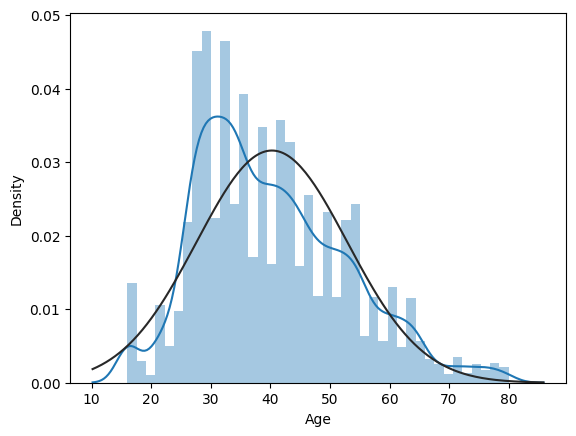

In [16]:
import seaborn as sns
import scipy.stats as stats

skew = df["Age"].skew()
ax = sns.distplot(df["Age"], fit = stats.norm)

#### ⚠️ Skriv inn alle forklaringsvariablene som du har bestemt skal være kategoriske i "categorical_features"-listen nedenfor

Det er lagt inn et par eksempler, men det er nok fler!

In [10]:
categorical_features=['Month', 'Sex']

In [17]:
from sklearn.preprocessing import LabelEncoder

#### Encoding vil bare fungere dersom du har mappet alle de numeriske forklaringsvariablene riktig. 

In [18]:
df[categorical_features] = df[categorical_features].apply(LabelEncoder().fit_transform)

df.to_parquet('data/fraud_processed.pq')  # Lagre prosessert data ut til en fil i parquet-format, som kan leses inn i den andre notebooken